In [8]:
import pandas as pd

# Importing the datasets
red_dataset = pd.read_excel('Data/winequality-red.xlsx')
red_dataframe = pd.read_excel('Data/winequality-red.xlsx', header=1)
red_dataframe.drop_duplicates(inplace=True)
red_dataframe['wine_type'] = 'red'

white_dataset = pd.read_excel('Data/winequality-white.xlsx')
white_dataframe = pd.read_excel('Data/winequality-white.xlsx', header=1)
white_dataframe.drop_duplicates(inplace=True)
white_dataframe['wine_type'] = 'white'

# Combining the datasets
all_wine = pd.concat([white_dataframe, red_dataframe], ignore_index=True)

In [9]:
# Task 9 – Binning the pH values into groups

# Split the pH column into 5 and 10 equal-width bins
all_wine['pH_bin_5'] = pd.cut(all_wine['pH'], bins=5)
all_wine['pH_bin_10'] = pd.cut(all_wine['pH'], bins=10)

# Get the relative frequency (density) for each bin
density_5 = all_wine['pH_bin_5'].value_counts(normalize=True)
density_10 = all_wine['pH_bin_10'].value_counts(normalize=True)

print("5-bin density:\n", density_5)
print("\n10-bin density:\n", density_10)


5-bin density:
 pH_bin_5
(2.978, 3.236]    0.505075
(3.236, 3.494]    0.392669
(3.494, 3.752]    0.051692
(2.719, 2.978]    0.047556
(3.752, 4.01]     0.003008
Name: proportion, dtype: float64

10-bin density:
 pH_bin_10
(3.107, 3.236]    0.322932
(3.236, 3.365]    0.263722
(2.978, 3.107]    0.182143
(3.365, 3.494]    0.128947
(2.849, 2.978]    0.044925
(3.494, 3.623]    0.042857
(3.623, 3.752]    0.008835
(2.719, 2.849]    0.002632
(3.752, 3.881]    0.002256
(3.881, 4.01]     0.000752
Name: proportion, dtype: float64


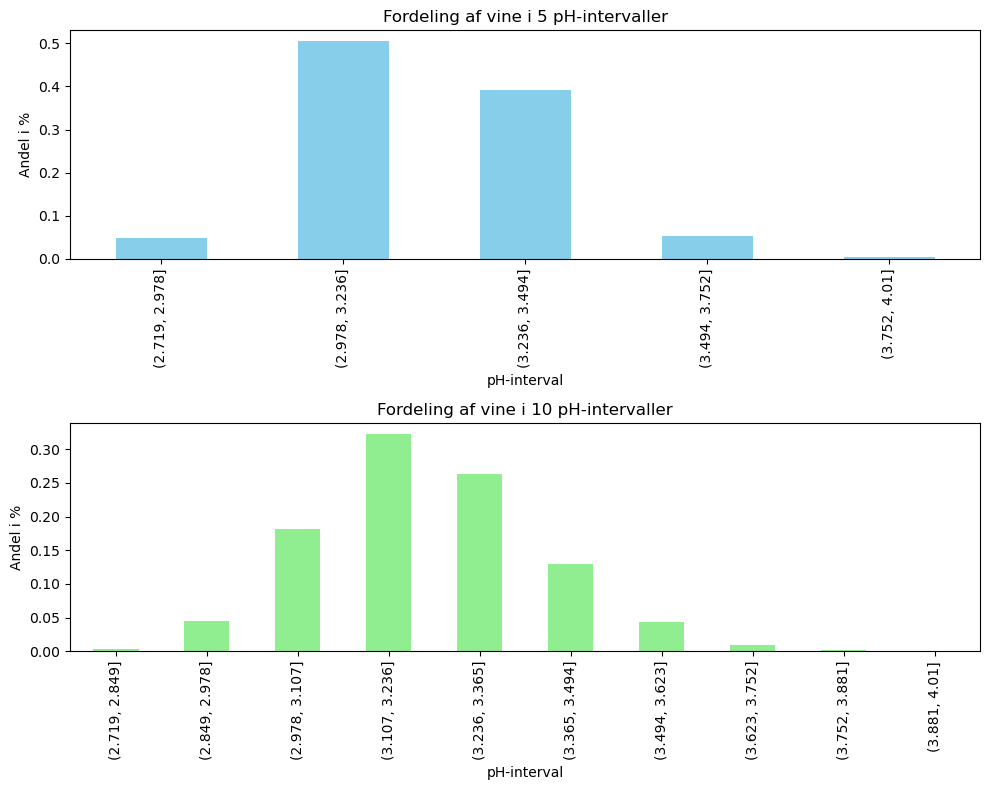

In [10]:
import matplotlib.pyplot as plt

# Simulate the data for the 5 bins
density_5 = pd.Series({
    "(2.978, 3.236]": 0.505075,
    "(3.236, 3.494]": 0.392669,
    "(3.494, 3.752]": 0.051692,
    "(2.719, 2.978]": 0.047556,
    "(3.752, 4.01]": 0.003008
})

density_10 = pd.Series({
    "(3.107, 3.236]": 0.322932,
    "(3.236, 3.365]": 0.263722,
    "(2.978, 3.107]": 0.182143,
    "(3.365, 3.494]": 0.128947,
    "(2.849, 2.978]": 0.044925,
    "(3.494, 3.623]": 0.042857,
    "(3.623, 3.752]": 0.008835,
    "(2.719, 2.849]": 0.002632,
    "(3.752, 3.881]": 0.002256,
    "(3.881, 4.01]": 0.000752
})

# Make bar chart
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))

# 5-bins plot
density_5.sort_index().plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Fordeling af vine i 5 pH-intervaller')
axes[0].set_ylabel('Andel i %')
axes[0].set_xlabel('pH-interval')

# 10-bins plot
density_10.sort_index().plot(kind='bar', ax=axes[1], color='lightgreen')
axes[1].set_title('Fordeling af vine i 10 pH-intervaller')
axes[1].set_ylabel('Andel i %')
axes[1].set_xlabel('pH-interval')

plt.tight_layout()
plt.show()


Text for README fil

Vi har opdelt vinens pH-værdier i henholdsvis 5 og 10 lige store intervaller (bins) for at få et bedre overblik over, hvordan surhedsgraden fordeler sig. Resultaterne viser, at langt de fleste vine har en pH-værdi mellem ca. 3,1 og 3,5, hvilket betyder, at de fleste vine har en moderat surhedsgrad. 5-bins giver et hurtigt overblik, mens 10-bins viser en mere detaljeret fordeling.

Søjlediagrammerne visualiserer disse opdelinger. Diagrammet for 5 bins giver et klart billede af, at størstedelen af vinene falder inden for de første to intervaller, mens diagrammet for 10 bins giver en finere opdeling og viser, at der er en mere jævn fordeling over et lidt større interval. Begge diagrammer hjælper med at forstå pH-fordelingen, og hvordan vinene er placeret i forhold til hinanden.

Denne indsigt kan være nyttig både for vinproducenter og forbrugere, som er interesserede i syreindholdets betydning for vinens smag.